In [164]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as im
from sklearn.cluster import KMeans
import os

%matplotlib inline


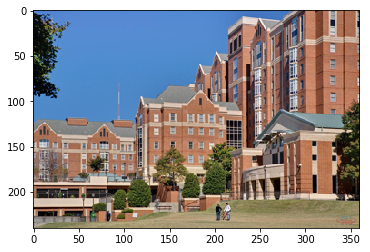

In [165]:
image = im.imread('gatech.bmp')

imageplot = plt.imshow(image)

plt.show()

In [166]:
x = image.shape[0]
y = image.shape[1]
z = image.shape[2]
newim = np.reshape(image,(x*y,z))

In [167]:
kmeans = KMeans(n_clusters=10, random_state=0).fit(newim)
centers = kmeans.cluster_centers_  #cluster centers
cluster_ids = kmeans.labels_ #cluster assignments


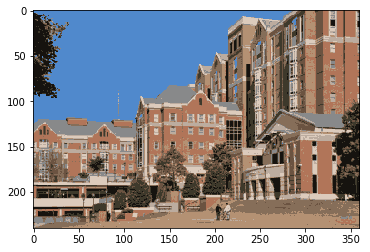

In [168]:
kmeans_img = np.reshape(centers[cluster_ids], (x,y,z))
kmeans_plot = plt.imshow(kmeans_img/255)
plt.show()

In [191]:
#Clothing part
foldername = "./fashion";
topcolors = 4 #the number of top colors we want to compare

#iterate through folder and find kmeans data

num_points = len(os.listdir(foldername))

centerPoints = np.zeros((num_points,topcolors,3))
weights = np.ones((num_points,topcolors))
count =0

for item in os.listdir(foldername):
 
    image = im.imread(foldername+'/'+item)

    x = image.shape[0]
    y = image.shape[1]
    z = image.shape[2]
    newim = np.reshape(image,(x*y,z))

    
    kmeans = KMeans(n_clusters=topcolors, random_state=0).fit(newim)
    centers = kmeans.cluster_centers_  #cluster centers
    cluster_ids = kmeans.labels_
    #for i in range(0,topcolors):
    #    vec = (cluster_ids == i)
    #    num = np.sum(vec)
    #    weights[count,i] = num/(x*y)
        
    centerPoints[count,:,:]=centers #the top colors in the picture
    
    
    
    
    
    
    count = count +1;
    



In [192]:
def Euclid_dist(x, y):

    ndim = x.shape[0];

    dist= np.sqrt(np.sum(np.square(x-y)))

        
    return dist
    raise NotImplementedError
    



def distanceCalc(weights,centerPoints):
    #centePoints is num*col*3
    num = centerPoints.shape[0]
    col = centerPoints.shape[1]
    FirstIm = np.zeros((3,1));
    SecondIm = np.zeros((3,1));
    distvec = np.zeros((num,num))
   
    
    for i in range(0,num):
        for j in range(0,num):
            for k in range(0,col):
                FirstIm[0] = FirstIm[0]+weights[i,k]*centerPoints[i,k,0];
                FirstIm[1] = FirstIm[1]+weights[i,k]*centerPoints[i,k,1];
                FirstIm[2] = FirstIm[2]+weights[i,k]*centerPoints[i,k,2];
                
                SecondIm[0] = SecondIm[0] + weights[i,k]*centerPoints[j,k,0]
                SecondIm[1] = SecondIm[1] + weights[i,k]*centerPoints[j,k,1]
                SecondIm[2] = SecondIm[2] + weights[i,k]*centerPoints[j,k,2]
                
           
                
                
            distvec[i,j] = Euclid_dist(FirstIm,SecondIm)
            distvec[j,i] = Euclid_dist(FirstIm,SecondIm)
            FirstIm = np.zeros((3,1));
            SecondIm = np.zeros((3,1));
            
            
    return distvec




def findGroup(WantedDist,distances):
    indices = np.argwhere(distances <= WantedDist)
    num = indices.shape[0]
    count = 0;
    
    
    for i in range(0,num):
       
        for j in range(0,num):
            if (indices[j,0] == i):
                if (count == 0):
                    newvec = indices[j,1]
                else:
                    newvec = np.append(newvec,indices[j,1])
                count = count+1
        count = 0;
        
        print(newvec)
        
        #if (i == 0):
        #    finalvec = newvec
        #else:
        #finalvec = np.append(finalvec,newvec,axis =0)
            

    #print(finalvec)
    
    
                
                
                
                

In [204]:

distances = distanceCalc(weights,centerPoints)
findGroup(90,distances)
picNums = os.listdir(foldername)

[ 0 16]
[ 1  8 11 19]
2
[ 3  4 18]
[ 3  4  5 18 21 26]
[ 4  5  7 21 26]
[ 6 17 22 27]
[ 5  7 22]
[ 1  8 28]
[ 9 10 25]
[ 9 10]
[ 1 11 19]
12
13
[14 22]
[15 17]
[ 0 16]
[ 6 15 17 27]
[ 3  4 18 21 26]
[ 1 11 19]
20
[ 4  5 18 21 26]
[ 6  7 14 22]
[23 28]
24
[ 9 25]
[ 4  5 18 21 26]
[ 6 17 27]
[ 8 23 28]
[ 8 23 28]
[ 8 23 28]
[ 8 23 28]
[ 8 23 28]
[ 8 23 28]
[ 8 23 28]
[ 8 23 28]
[ 8 23 28]
[ 8 23 28]
[ 8 23 28]
[ 8 23 28]
[ 8 23 28]
[ 8 23 28]
[ 8 23 28]
[ 8 23 28]
[ 8 23 28]
[ 8 23 28]
[ 8 23 28]
[ 8 23 28]
[ 8 23 28]
[ 8 23 28]
[ 8 23 28]
[ 8 23 28]
[ 8 23 28]
[ 8 23 28]
[ 8 23 28]
[ 8 23 28]
[ 8 23 28]
[ 8 23 28]
[ 8 23 28]
[ 8 23 28]
[ 8 23 28]
[ 8 23 28]
[ 8 23 28]
[ 8 23 28]
[ 8 23 28]
[ 8 23 28]
[ 8 23 28]
[ 8 23 28]
[ 8 23 28]
[ 8 23 28]
[ 8 23 28]
[ 8 23 28]
[ 8 23 28]
[ 8 23 28]
[ 8 23 28]
[ 8 23 28]
[ 8 23 28]
[ 8 23 28]
[ 8 23 28]
[ 8 23 28]
[ 8 23 28]
[ 8 23 28]
[ 8 23 28]
[ 8 23 28]
[ 8 23 28]


./fashion/29.jpg


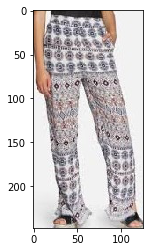

./fashion/15.jpg


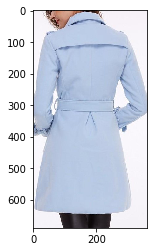

./fashion/24.jpg


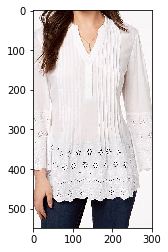

./fashion/25.jpg


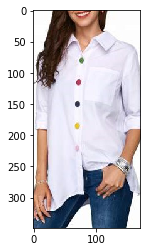

./fashion/2.jpg


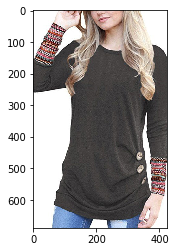

In [208]:
array = [4,  5, 18, 21, 26]
for i in array:
    image = im.imread(foldername+"/"+picNums[i])
    print(foldername+"/"+picNums[i])

    imageplot = plt.imshow(image)

    plt.show()
